<p style="font-size:30px;">Imports</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import plotly.express as px

<p style="font-size:30px;">read full data from excel in 5 rows</p>

In [2]:
data = pd.read_excel("Volve production data.xlsx")
data.head(5)          #It is used to show the beginning lines

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


<p style="font-size:30px;">create a filtered dataframe </p>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'WELL_BORE_CODE'),
  Text(2.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(3.5, 0, 'NPD_WELL_BORE_NAME'),
  Text(4.5, 0, 'NPD_FIELD_CODE'),
  Text(5.5, 0, 'NPD_FIELD_NAME'),
  Text(6.5, 0, 'NPD_FACILITY_CODE'),
  Text(7.5, 0, 'NPD_FACILITY_NAME'),
  Text(8.5, 0, 'ON_STREAM_HRS'),
  Text(9.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(10.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(11.5, 0, 'AVG_DP_TUBING'),
  Text(12.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(13.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(14.5, 0, 'AVG_CHOKE_UOM'),
  Text(15.5, 0, 'AVG_WHP_P'),
  Text(16.5, 0, 'AVG_WHT_P'),
  Text(17.5, 0, 'DP_CHOKE_SIZE'),
  Text(18.5, 0, 'BORE_OIL_VOL'),
  Text(19.5, 0, 'BORE_GAS_VOL'),
  Text(20.5, 0, 'BORE_WAT_VOL'),
  Text(21.5, 0, 'BORE_WI_VOL'),
  Text(22.5, 0, 'FLOW_KIND'),
  Text(23.5, 0, 'WELL_TYPE')])

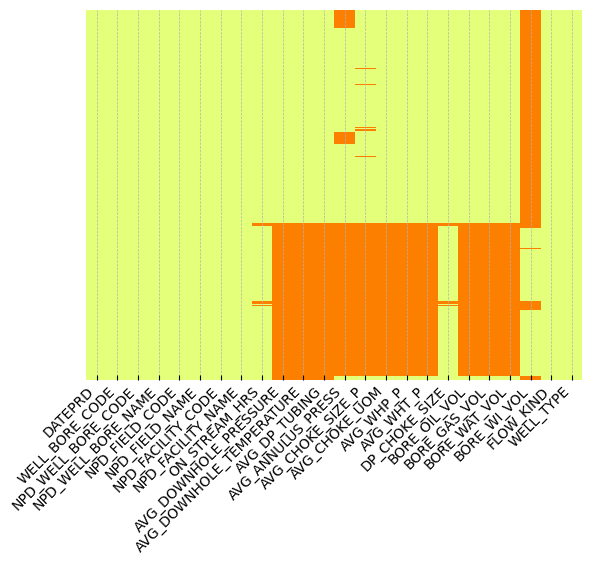

In [6]:
#view a heatmap diagram of all the fields in dataframe, 
#The orange color represents the null values
A= sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Wistia')
plt.xticks(rotation = 45, ha = 'right')

In [7]:
# to get the type of well available (either Injector WI or producer OP)
data['WELL_TYPE'].unique()

array(['WI', 'OP'], dtype=object)

In [8]:
# this returns all the unique well codes, Here we see that there are total of 7 unique wells
data['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769], dtype=int64)

In [9]:
# filter only the producing well data which have well type as OP 
data[data['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5769], dtype=int64)

In [10]:
# create a filtered/cleaned dataframe and store only the data for producer type wells for our anaysis
data_filter =data[data['WELL_TYPE'] == 'OP']

In [11]:
# the dataframe has many columns that are not useful for our analysis
# droping all these column in our filtered dataframe as these are not useful for our study
data_filter.drop(labels=['WELL_BORE_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_CODE',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.00000,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.00000,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.00000,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN
5,2014-04-12,7405,0.0,303.50078,96.92339,281.44744,0.00000,3.087015,22.05334,8.70429,22.05334,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,5769,0.0,NaN,NaN,NaN,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0,NaN
15629,2016-09-14,5769,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN
15630,2016-09-15,5769,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN
15631,2016-09-16,5769,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'WELL_BORE_CODE'),
  Text(2.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(3.5, 0, 'NPD_WELL_BORE_NAME'),
  Text(4.5, 0, 'NPD_FIELD_CODE'),
  Text(5.5, 0, 'NPD_FIELD_NAME'),
  Text(6.5, 0, 'NPD_FACILITY_CODE'),
  Text(7.5, 0, 'NPD_FACILITY_NAME'),
  Text(8.5, 0, 'ON_STREAM_HRS'),
  Text(9.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(10.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(11.5, 0, 'AVG_DP_TUBING'),
  Text(12.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(13.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(14.5, 0, 'AVG_CHOKE_UOM'),
  Text(15.5, 0, 'AVG_WHP_P'),
  Text(16.5, 0, 'AVG_WHT_P'),
  Text(17.5, 0, 'DP_CHOKE_SIZE'),
  Text(18.5, 0, 'BORE_OIL_VOL'),
  Text(19.5, 0, 'BORE_GAS_VOL'),
  Text(20.5, 0, 'BORE_WAT_VOL'),
  Text(21.5, 0, 'BORE_WI_VOL'),
  Text(22.5, 0, 'FLOW_KIND'),
  Text(23.5, 0, 'WELL_TYPE')])

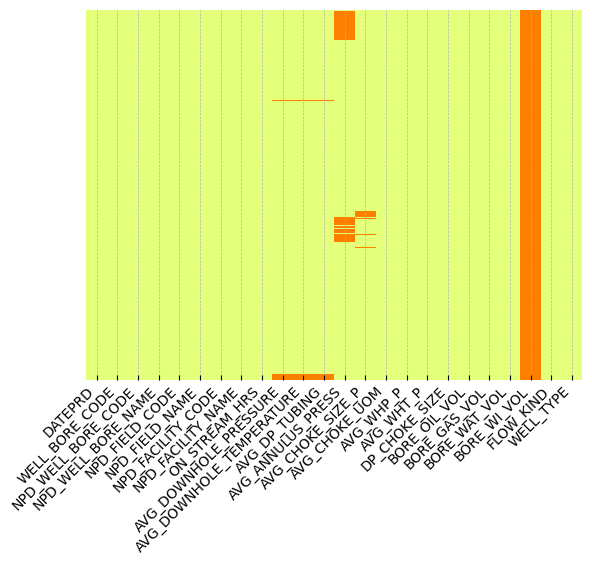

In [12]:
# After droping unuseful columns, we can again plot a heatmap plot to visualize null data in our dataframe
sns.heatmap(data_filter.isnull(),yticklabels=False,cbar=False,cmap='Wistia')
plt.xticks(rotation = 45, ha = 'right')

In [13]:
# counts number of data available for each well id
data_filter['NPD_WELL_BORE_CODE'].value_counts()

NPD_WELL_BORE_CODE
5599    3056
5351    3056
7078    1165
7289     978
7405     744
5769     144
Name: count, dtype: int64

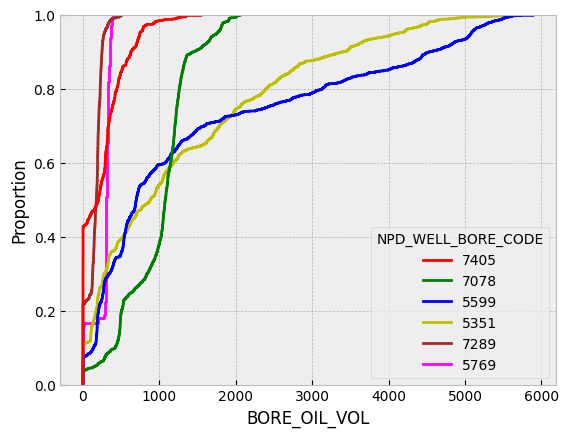

In [30]:
#from the seaborn library , we can use the Empirical Cumulative Distribution Function , and plot the oil production from all those wells having code as producers 
sns.ecdfplot(x='BORE_OIL_VOL',data=data_filter, hue='NPD_WELL_BORE_CODE',palette=['r', 'g', 'b', 'y', 'brown', 'magenta'])
plt.show()

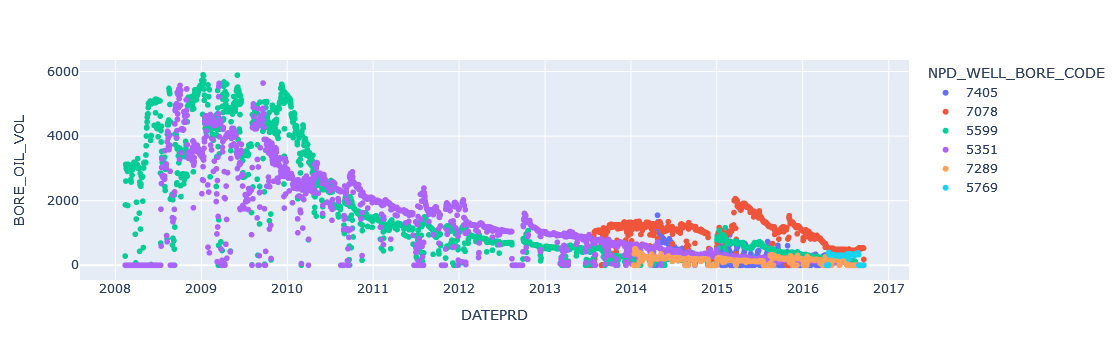

In [31]:
# Another Scatter plot to show the oil production from these producer wells. Clearly the wells #7405, # 5769, #7289 production volume is insignificant
data_filter["NPD_WELL_BORE_CODE"] = data_filter["NPD_WELL_BORE_CODE"].astype(str)
fig = px.scatter(data_filter, x="DATEPRD", y="BORE_OIL_VOL",
                 color="NPD_WELL_BORE_CODE",
                 hover_name="NPD_WELL_BORE_CODE")
fig.show()

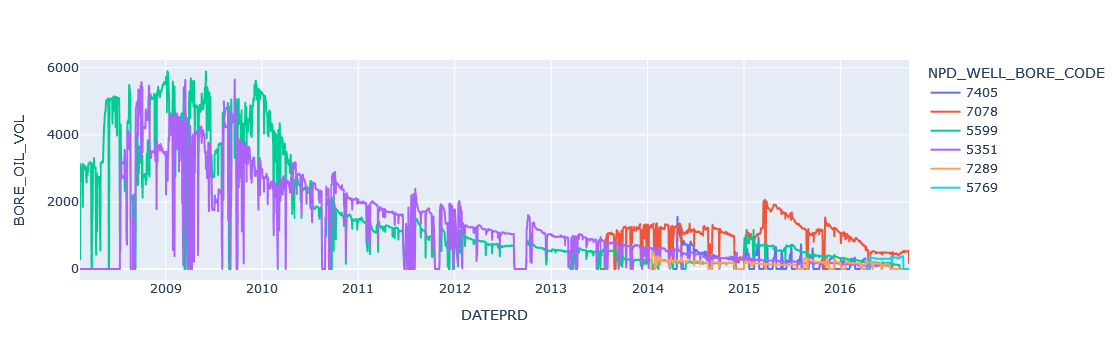

In [32]:
fig = px.line(data_filter, x="DATEPRD", y="BORE_OIL_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

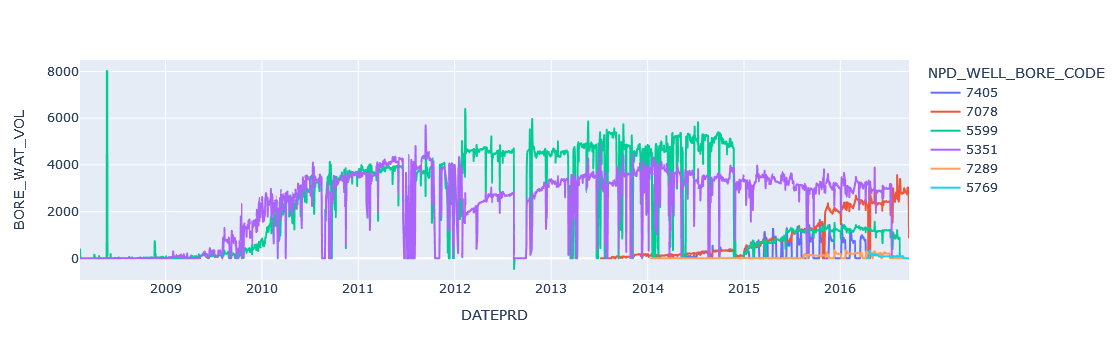

In [33]:
fig = px.line(data_filter, x="DATEPRD", y="BORE_WAT_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

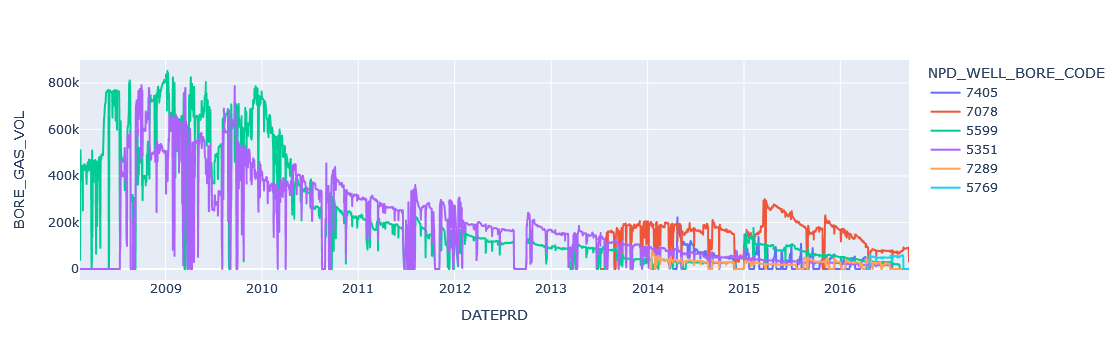

In [34]:
fig = px.line(data_filter, x="DATEPRD", y="BORE_GAS_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

In [44]:
#to find correlation between different types of data available to us
sns.heatmap(data_filter.corr(),square=True,cmap='RdYlGn')

ValueError: could not convert string to float: 'NO 15/9-F-1 C'